In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Data Preprocess

In [6]:

df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [7]:
df['Performance Index']=df['Performance Index'].astype(int)

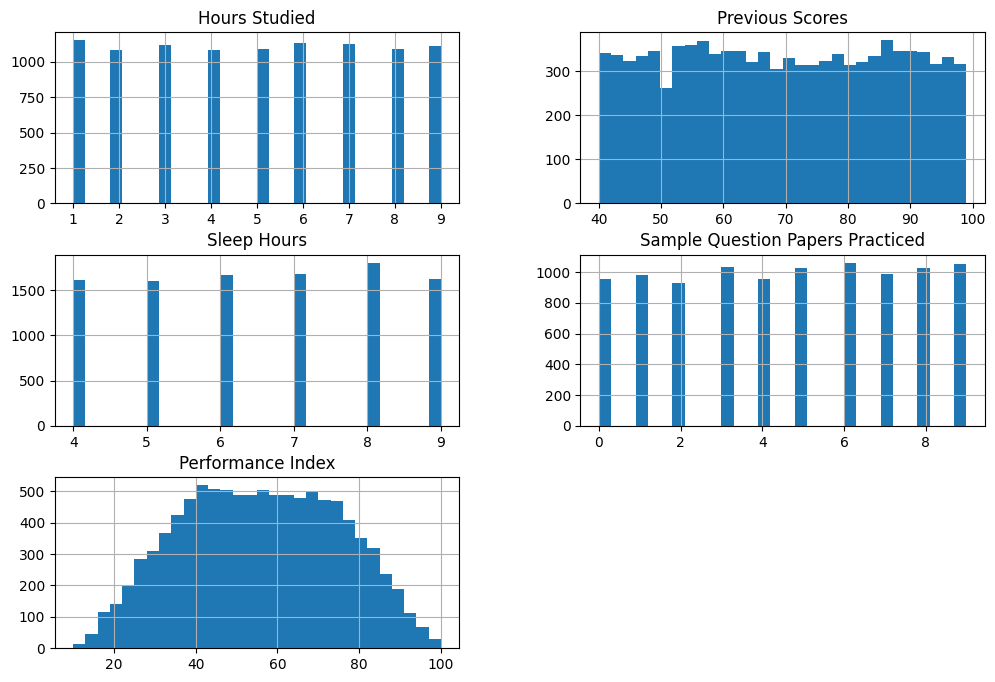

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(12,8))
plt.show()


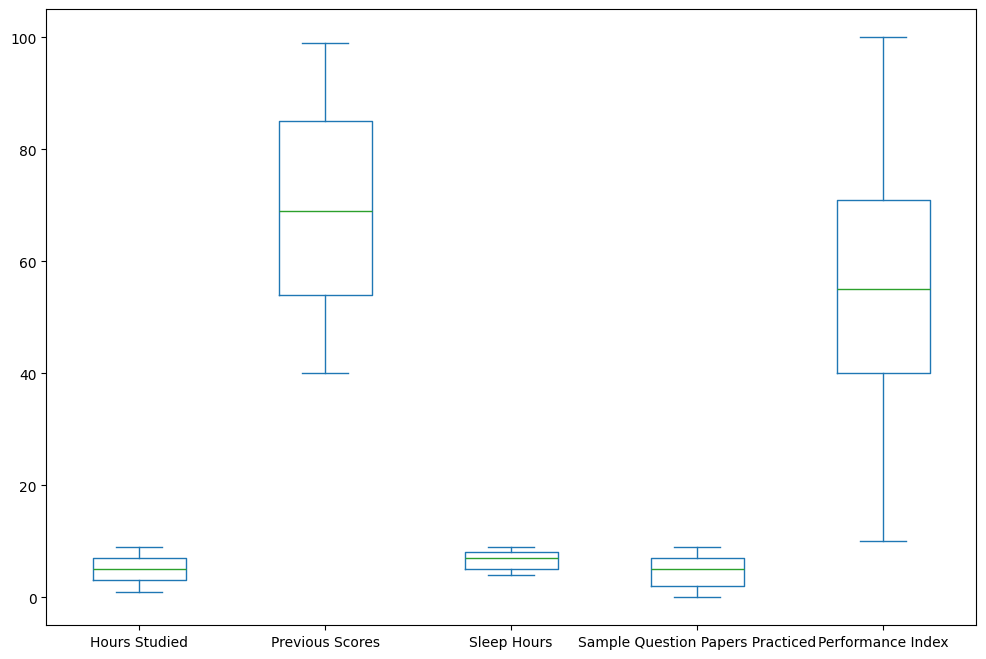

In [11]:
df.plot(kind="box",figsize=(12,8))
plt.show()

In [12]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [14]:
z=df.corr(numeric_only=True)
z

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

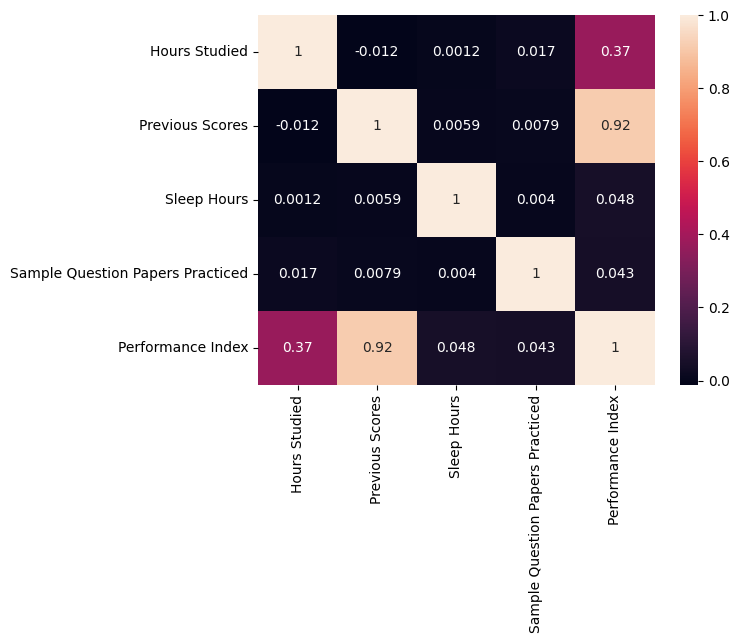

In [15]:
sns.heatmap(z,annot=True)

In [8]:
x=df.iloc[:,:-1]
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [9]:
y=df["Performance Index"]
y

,Performance Index
0,91
1,65
2,45
3,36
4,66
...,...
9995,23
9996,58
9997,74
9998,95


In [ ]:
activities=pd.get_dummies (x['Extracurricular Activities'],drop_first= True)
x=x.drop('Extracurricular Activities',axis=1)
x=pd.concat([x,activities],axis=1)
x


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Yes
0,7,99,9,1,True
1,4,82,4,2,False
2,8,51,7,2,True
3,5,52,5,2,True
4,7,75,8,5,False
...,...,...,...,...,...
9995,1,49,4,2,True
9996,7,64,8,5,True
9997,6,83,8,5,True
9998,9,97,7,0,True


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

In [ ]:
score=r2_score(y_test, y_pred)
score

0.9889832909573145

In [ ]:
# hoursstudied=int(input("Enter your Hours Studied:"))
# previousscores=int(input("Enter your 	Previous Scores:"))
# sleephours=int(input("Enter your Sleep Hours:"))
# extracurricularactivities= int(input("Enter Extracurricular Activities:"))
# samplequestionpaperspracticed =int(input("Enter Sample Question Papers Practiced:"))


# performance=model.predict(pd.DataFrame([[hoursstudied,previousscores,sleephours,extracurricularactivities,samplequestionpaperspracticed]],
#                                             columns=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
#        'Sleep Hours', 'Sample Question Papers Practiced']))
# print("Student Performance is:", performance)

In [ ]:
performance=model.predict(x)
performance

array([91.82019447, 63.17245064, 45.09519332, ..., 72.98628364,
       94.34547152, 65.30993133])